<h1> Prediction Using Unsupervised ML - By Alokik Gupta </h1>

<h3><i> Predicting the optimum number of clusters from the given Iris dataset and representing them visually </i></h3>

In [1]:
# Link to download iris dataset: https://bit.ly/3kXTdox
# We will use KMeans for clustering the dataset 
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the iris dataset after downloading
iris = pd.read_csv('Downloads/Iris.csv')

In [3]:
# First 5 rows of the dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Finding the number of rows and columns in the dataset 
iris.shape

(150, 6)

In [5]:
# The Id column has no relevance to us so we drop it
# Since, KMeans works with only numeric values, we drop the Species column
irisnew = iris.drop(['Id','Species'], axis=1)
# First 5 rows of the modified dataset
irisnew.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# We use the elbow method to find the optimum number of clusters
inertia = []
n = []
# For loop to find the inertia for different number of clusters in range 1-19
for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_predict(irisnew)
    inertia.append(kmeans.inertia_)
    n.append(i)

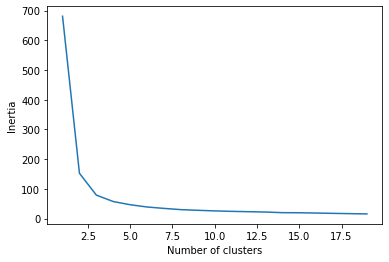

In [7]:
# Plot of inertia vs number of clusters.
plt.plot(n, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
# From above plot, we can see that the inertia doesn't change significantly beyond n = 3
# Therefore, optimum number of clusters = 3
# Implemeting KMeans with 3 clusters - 
kmeans = KMeans(n_clusters=3)
# Prediction by KMeans algorithm assigning each observation in the dataset to a cluster
data = kmeans.fit_predict(irisnew)

In [18]:
# The three clusters are represented by values 0, 1, 2
data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

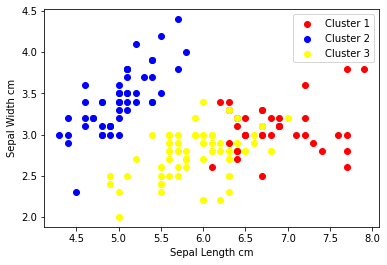

In [19]:
# Scatterplot of Sepal Width vs Sepal Length to visualize the clustering by KMeans
plt.scatter(irisnew[data == 0].SepalLengthCm, irisnew[data==0].SepalWidthCm, c = 'red', label = 'Cluster 1')
plt.scatter(irisnew[data == 1].SepalLengthCm, irisnew[data==1].SepalWidthCm, c = 'blue', label = 'Cluster 2')
plt.scatter(irisnew[data == 2].SepalLengthCm, irisnew[data==2].SepalWidthCm, c = 'yellow', label = 'Cluster 3')
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.legend()
plt.show()

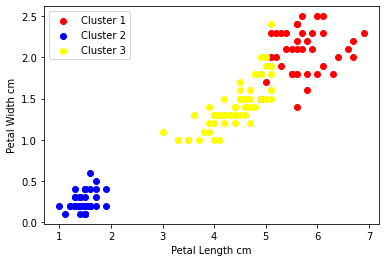

In [14]:
# Scatterplot of Petal Width vs Petal Length showing the 3 clusters with different colours
plt.scatter(irisnew[data == 0].PetalLengthCm, irisnew[data==0].PetalWidthCm, c = 'red', label = 'Cluster 1')
plt.scatter(irisnew[data == 1].PetalLengthCm, irisnew[data==1].PetalWidthCm, c = 'blue', label = 'Cluster 2')
plt.scatter(irisnew[data == 2].PetalLengthCm, irisnew[data==2].PetalWidthCm, c = 'yellow', label = 'Cluster 3')
plt.xlabel('Petal Length cm')
plt.ylabel('Petal Width cm')
plt.legend()
plt.show()